<a href="https://colab.research.google.com/github/anisbagwan/Mobile-Price-Range-Prediction-Capstone-Project/blob/main/Mobile_Price_Range_Prediction_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# DATA DEFINITION -

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

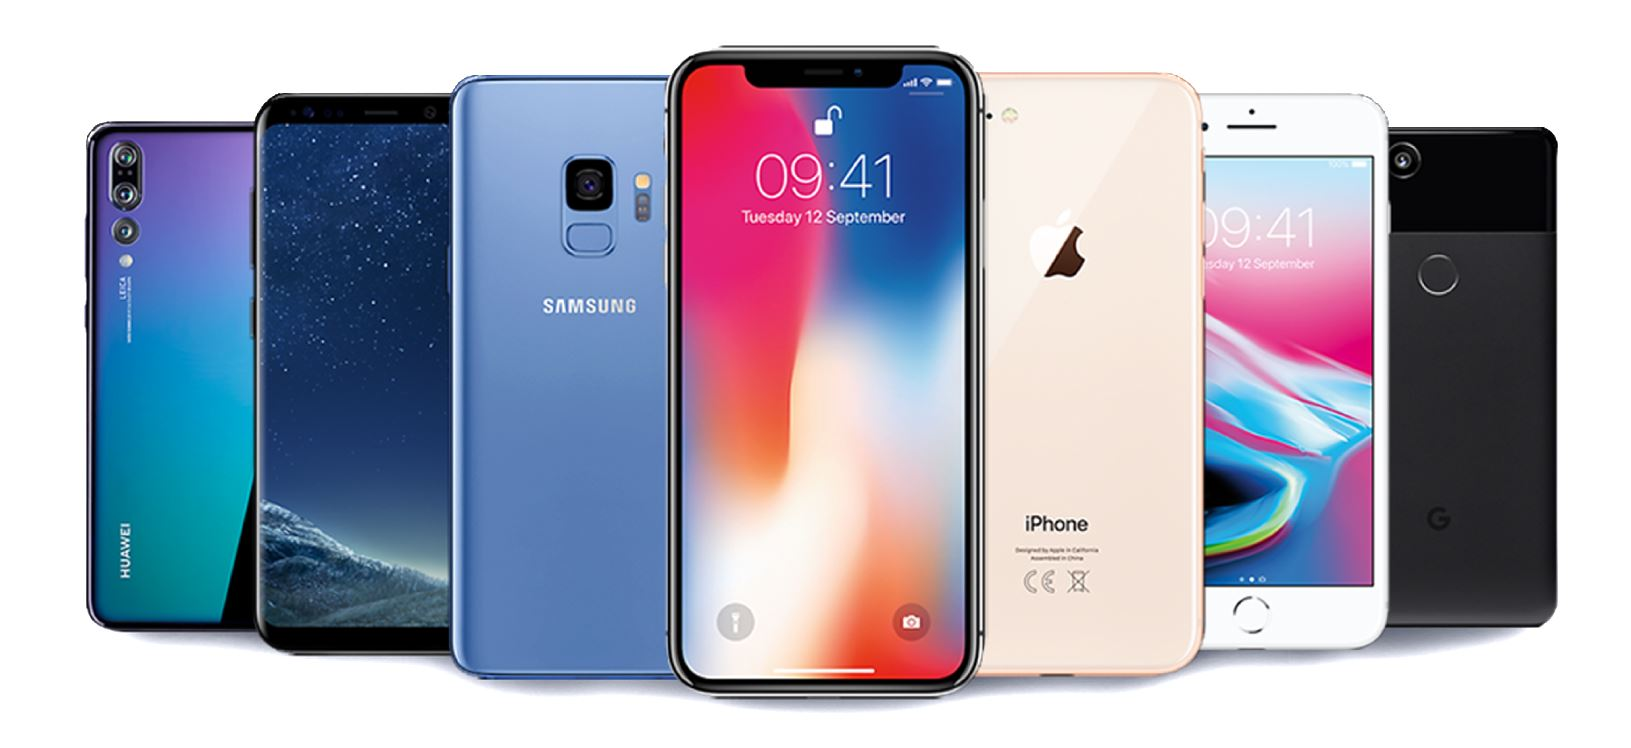

###   “The moment you make a mistake in pricing, you're eating into your reputation or your profits.”   
                                                               - Katharine Paine (founder and CEO of KDPaine & Partners LLC)


We are in an era of mobile phone revolution, where the changes in a span of less than a decade have been so dramatic that many have come to realise that they can’t think of a life without a mobile phone. The dependibility of people on their phone created a huge demand in the phone market, due to which many new players (phone Brands) entered the market. Today, phone market is considered as a highly competitive market and one has to do adequate research before entering or launching their new product.Harvard studies have found that a 1% improvement in your pricing can add up to 11% to your profits. With bad pricing, you’re missing out on profits in every transaction that you make, not to mention the deals that you completely miss out on. Pricing is also a big factor in your branding and reputation. Prices that are too high can make you come off as arrogant, while prices that are too low can call the quality of your product into question.

We have been provided a dataset with name ***"data_mobile_price_range"***, which we have to analyse in order to identify the factors which drives the phone price. For this, we will perform exploratory data analysis in the provided data and will try to draw some useful insights and correlations between price range and phone features. 
Further, we will create a Supervised ML classification model which would help the company to predict/decide the pricing of a phone depending on the given phone features.

To achieve above objective, we have divided the task into following steps :
    
    1.  Understand The Data    
    2.  Data Cleaning- Getting Data Ready to Analyse
    4.  Discovering Information - Analysis
    5.  Feature Engineering 
    6.  Model Fitting
    7.  Hyperparameter Tuning
    8.  Cross Validation
    9.  Conclusion
    
------------------------------------------------------------------------------

# Let's start with **importing important libraries** which will be useful in the excercise.

In [8]:
# Importing important Libraries

import pandas as pd                     # To bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
import seaborn as sns                   # For statistical graphics

import warnings
warnings.filterwarnings("ignore")

It's time to mount our google drive with the notebook and import our mine - **"data_mobile_price_range"** dataset.

In [9]:
# Mount the google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Importing the dataset

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ML Capsotne Classification/Copy of data_mobile_price_range.csv')

We have imported our dataset and it is time to understand the data. Launching first step of our task.....

# 1. Understand The Data

Understanding new data is like understanding a new person. You first interact , observe their personality and then assess them. We are going to follow same with our dataset.
 
   * The First Interaction : We will explore top and bottom few rows of our data 
   * Observe the Features : Then we will check all the variables and their definition
   * Assessing : After that we will see size data , information of variables and statistical description of numerical variables
   
It's time for the action : **The First Interaction !**



In [11]:
# Display top 5 rows 

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
# Display bottom 5 rows 

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


The data seems interesting from the first look. We understood there are good number of variables and it seems all or most of them have numerical values in them. Let us have a close look on our variables.
Initiating second step of data exploration : **Observe the Features**

In [13]:
# Display shape of data
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

#Display column names
print(f'Our dataset has following columns - {list(df.columns)}')

Our dataset has 2000 rows and 21 columns.
Our dataset has following columns - ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


We have been also provided a document which gives definitions of the above 21 variables. Let us take a look on their **definitions** :

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

Let us move ahead and execute third step of our data exporation : **Assessing the Data**

In [14]:
# Display information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All numerical values !! That is nice . Just two variables are of float type and rest 19 are of int type. Let us take a look on their **statistical description and number of unique values** they have.

In [15]:
# Display statistical data of all columns with numerical values
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
# Display number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### What We Understood !
We have explored our dataset which consists of **2000 rows and 21 columns**. On going through all varibales, we identified **'price_range' as our dependent variable**. On taking a look of all unique values we found that our variables have two types of data- continous and discrete type. Variables like 'blue', 'dual_sim','four_g','three_g','touch_screen','wifi' have **discrete values.**

--------------------------------------------------------------------------

#  2. Data Cleaning - Making Data Ready To Analyse
Our next task is to clean our data and get it ready for the analysation part. For data cleaning we will look for **duplicate values, Null/Missing values and Outliers** and will try to eliminate them if and when required.

In [45]:
 # Display null values numbers in each column
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

None of the columns have null value in it !!

In [46]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
if check_dupl == False:
    print('There are no duplicate rows in our data')
else:
    print ('There are duplicate rows in our data')

There are no duplicate rows in our data


That's great !! Looks like we have got a cleaned data. It's time to look for **Outliers -**

### Checking For Outliers !!

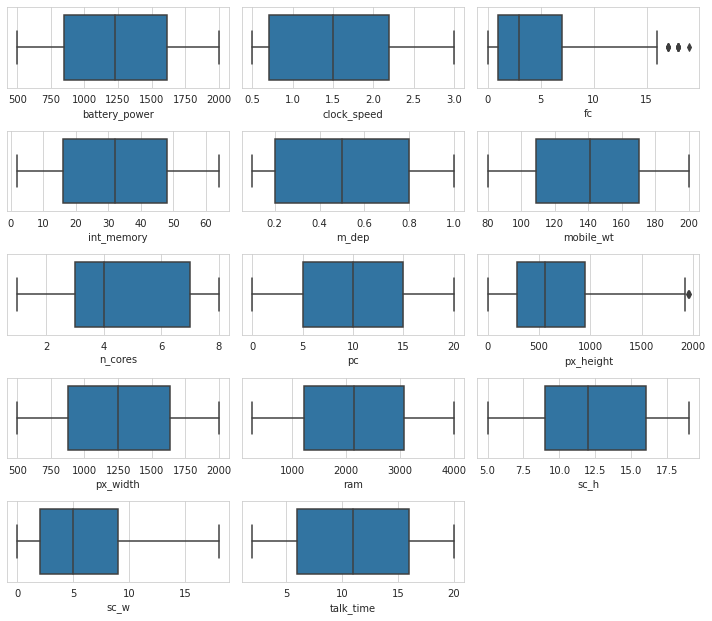

In [47]:
#Create figure object
fig = plt.subplots(figsize=(10,10))

# Create boxplot for each numerical variable
for i,j in enumerate(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc','px_height','px_width','ram', 'sc_h','sc_w','talk_time']):
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

Only 'fc' variable (which tells about front camera megapixel) and px_height variable (which tells about pixels heights) , have very very few countable outliers and their values also lies in an acceptable range. Hence, it is better to leave those outliers unattended.

We have made our data ready to analayse....or have we ?? Well, our data has been cleaned but still there are some scope to make our data easy to analyse. 

-------------------------------------------------------------------------------

Let's start doing feature engineering.

# 3. Feature Engineering


On carefully looking all the variables we found two pairs of variables which can be replaced by new variables.
### 1. Deriving new variable from sc_h and sc_w

Both sc_h and sc_w variables tells about the screen dimensions (screen height and width respectively). We use these information to derive a single variable , **sc_area** , which can replace these two.

In [17]:
# Creating a new column which gives the screen area size of the mobiles
df['sc_area']=df['sc_w']*df['sc_h']
# Drop sc_h and sc_w variable
df.drop(['sc_w','sc_h'],inplace=True,axis=1)

### 2. Deriving new variable from px_height and px_width
Both px_height and px_width variables talks about the pixels dimensions (pixel height and width respectively). We use these information to derive a new variable , **px_size** , which can replace these two.


In [18]:
# Creating a new column which gives the pixel size of the mobiles
df['px_size']=df['px_width']*df['px_height']
# Drop px_width and px_height variable
df.drop(['px_width','px_height'],inplace=True,axis=1)

# Discovering Information - Analysis

Now, we hope our data is ready to analyse. Our job is to identify the key factors which identify the price range of a phone. For this we will begin with univariate analysis, where we will be seeing the distribution of all price ranges in the given data. Then we will move to bivariate and multivariate analysis and will try to analyse the effects of features on the price range. This analysis will help to summarise the main characterstics of the feautres and also will help us to visualize their statistical graphics.

#### Univariate Analysis
Let us first understand how dependent variable is distributed across the data. Our dependent variable is 'price_range' which have four values. The price range value increase from 0 to 3. So, phone which comes in the price range of 0 is among the cheapest, while those which are coming in the range of 3, are the most expensive. So, 0 being the low cost range, 1 being the medium cost range, 2 being the high cost range and 3 is the very high cost range.

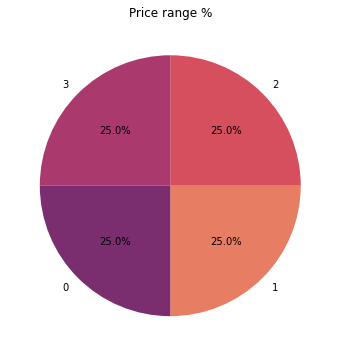

In [19]:
#Creating list of Price range
a=df['price_range'].unique()
#Creating list of individual price range count
b=df['price_range'].value_counts()
# Plotting a Pie chart
plt.figure(figsize=(10,6))
#explode=[0.1,0.1,0.1,0.1]
plt.pie(b, labels=a,colors=sns.color_palette("flare",4), 
        autopct="%.1f%%",shadow=False,startangle=270)
plt.title('Price range %')
# displaying chart
plt.show()

We've checked the percentage of every price range now we will see the original count of each price range. 

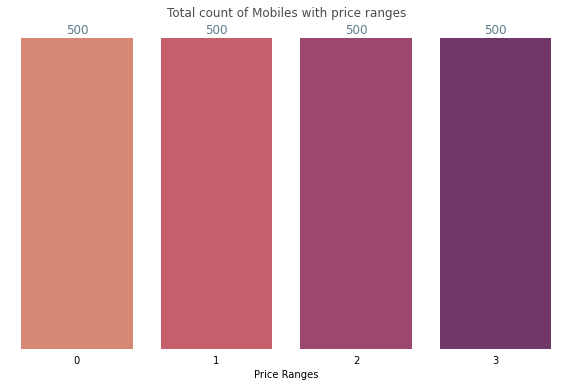

In [20]:
# Let's check the dependent variable first...
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(df['price_range'],palette='flare')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Price Ranges", ylabel = "")
plt.title('Total count of Mobiles with price ranges',alpha=0.7)


plt.show()

Dataset has its data divided into equal portions of all four price ranges.

-------------------------------------------------------------------------


#### Multivariate Analysis

Let's jump to the multivariate analysis where will be comparing our dependedent variable with two or more independent variables. We will first start comparing dependent variable with our discrete variables. Later, we will compare with continous variables. For the convinience,let us first create a function to plot discrete variables with dv.

In [21]:
# Creating a function to plot the categorical variables 
def count_plot(hue,xlabel,title):
  # Let's check the dependent variable first...
  plt.figure(figsize=(10,6))
  plt.grid(False)
  # Plotting the values in dependent variable
  ax=sns.countplot(x='price_range',hue=hue,data=df, palette='flare')

  # make one bar, the python bar, a contrasting color
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, 
                  labelleft=False, labelbottom=True)

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel=xlabel, ylabel = "")
  plt.title(title,alpha=0.7)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
  

  plt.show()

#### a. Distribution of Price Range depending on Bluetooth availibility
How the presence of a bluetooth varies for different price range ?? Let's find out !!

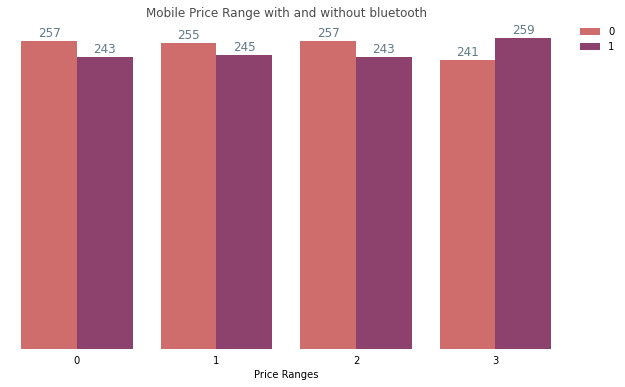

In [22]:
count_plot('blue','Price Ranges','Mobile Price Range with and without bluetooth')

For low,medium and high cost ranges , the trend is almost same i.e the phones without bluetooth are more in number than the phones with bluetooth (although the difference is less). BUT for the most expensive price range (3), the number of phones without bluetooth are more.

-----------------------------------------------------------------------------

#### b. Distribution of Mobile price ranges on the basis of 3g availibility

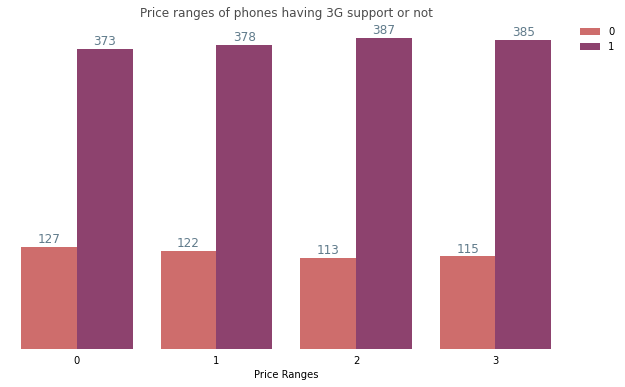

In [23]:
# Plotting price ranges of phones having 3G support or not
count_plot('three_g','Price Ranges','Price ranges of phones having 3G support or not')

Here, all the four price ranges show same trend. The number of handsets with 3g support are more than those without having 3g suport.

-----------------------------------------------------------------------------

#### c. Distribution of Mobilephones across different price ranges on the basis of 4g availibility

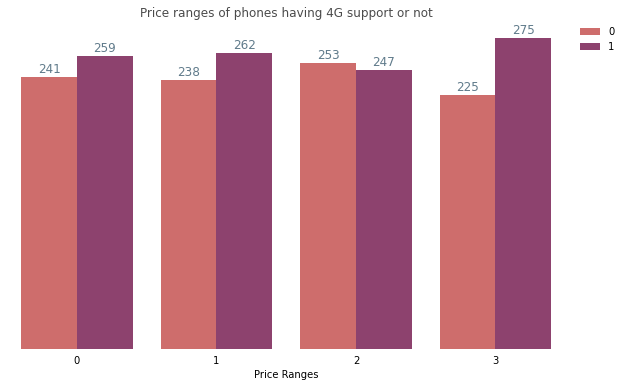

In [24]:
count_plot('four_g','Price Ranges','Price ranges of phones having 4G support or not')

Low,medium and very high cost range phones have maximum handsets with 4g support. While for high cost category, the number of handsets without 4g support is more.

-----------------------------------------------------------------------------

#### d. Distribution of Handsets across different price range on the basis of touch screen functionality

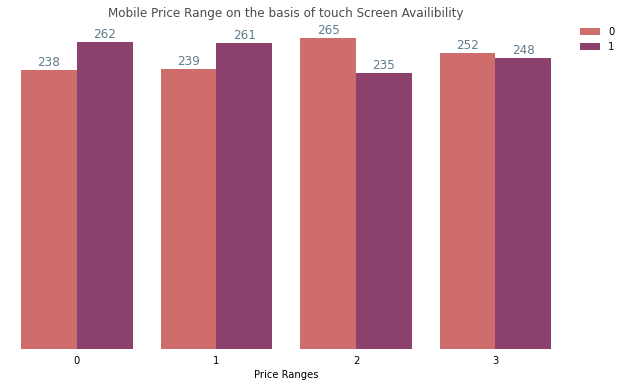

In [25]:
count_plot('touch_screen','Price Ranges','Mobile Price Range on the basis of touch Screen Availibility')

For low and medium price range most of the handsets are with touchscreen availibility. While in the High and very high cost segment, the number of handsets without touch screen feature are more.

-----------------------------------------------------------------------------

#### e. Distribution of Handsets across different price range on the basis of Wifi availibility

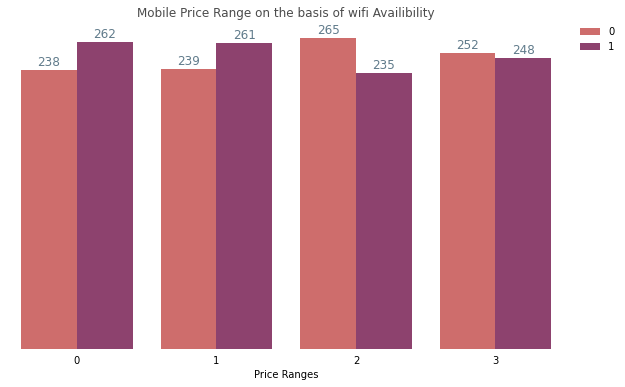

In [26]:
count_plot('touch_screen','Price Ranges','Mobile Price Range on the basis of wifi Availibility')

For low and medium price range handsets, majority of them are with wifi availibility. While for High and Very High price range mobiles, majority are not having Wifi. And the difference in numbers is much more in high price range handsets.

-----------------------------------------------------------------------------

#### f. Distribution of Handsets across different price range on the basis of dual sim slots 

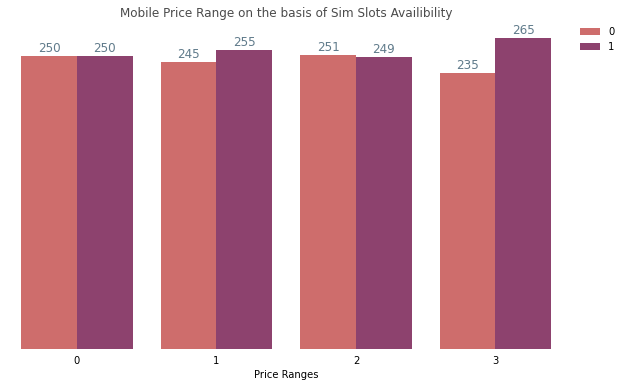

In [27]:
count_plot('dual_sim','Price Ranges','Mobile Price Range on the basis of Sim Slots Availibility')

We have compared all discrete variables and made some observations. Our next job is to compare our dependent variable with the continous variables. We will create a function to plot continous variables with our dependent variables.



In [28]:
# Creating a function to plot a line plot of numerical columns
def line_plot(y,title):

  plt.figure(figsize=(10,6), dpi=100)
  sns.set_style("whitegrid")

  sns.lineplot(data=df, x='price_range', y=y, 
              color='#8B3A62')
  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  # Draw grid lines with red color and dashed style
  plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

  plt.title(title)

#### g. Battery Power over different Price Range

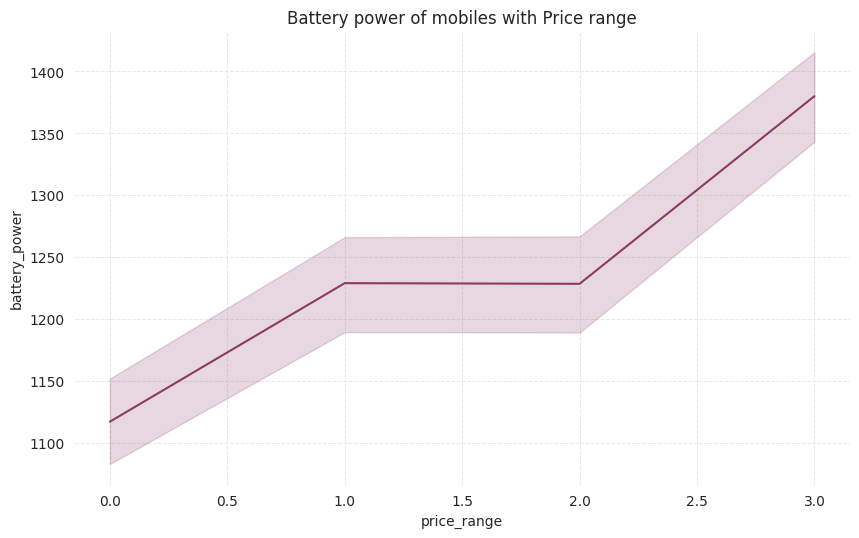

In [29]:
# Plotting battery power of mobiles with Price range
line_plot('battery_power','Battery power of mobiles with Price range')

#### h. Internal Memory over different Price Range

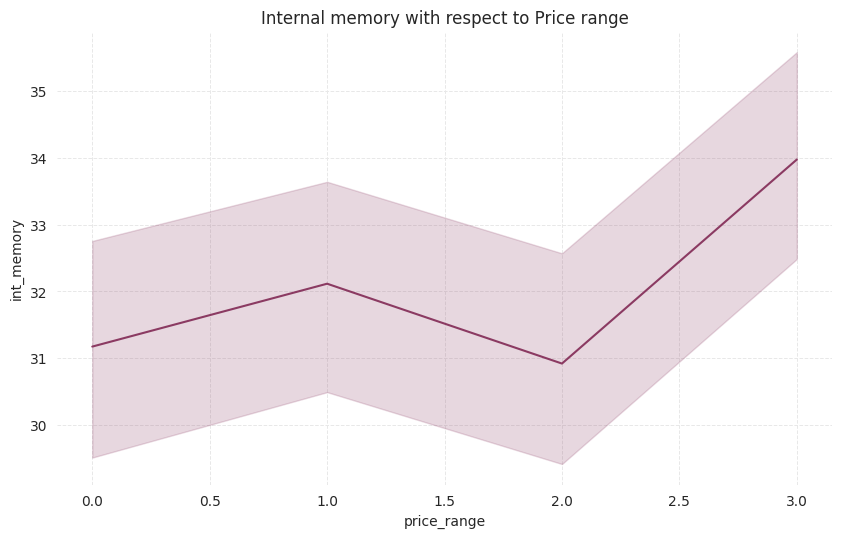

In [30]:
# Plotting rented bike count with respect to hour
line_plot('int_memory','Internal memory with respect to Price range')

#### i. Clock_speed over different price range

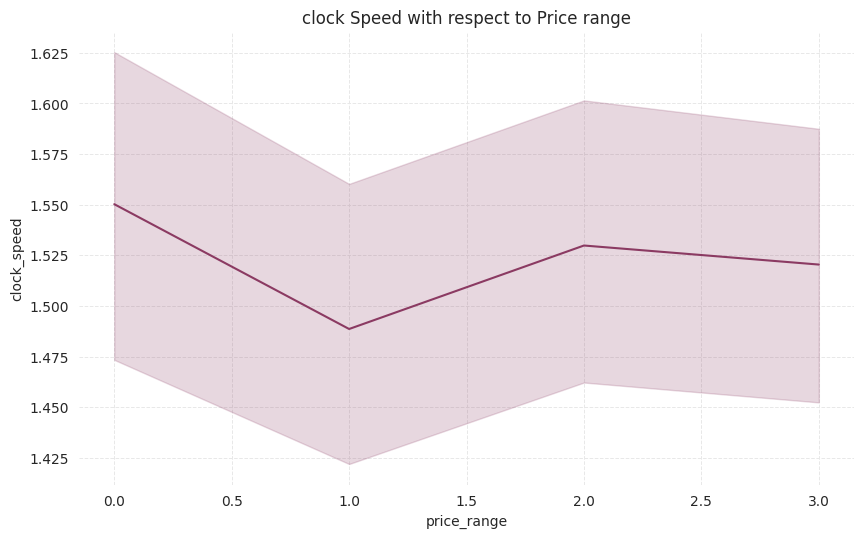

In [31]:
# Plotting rented bike count with respect to hour
line_plot('clock_speed','clock Speed with respect to Price range')

#### j. Front Camera Megapixels over different price range

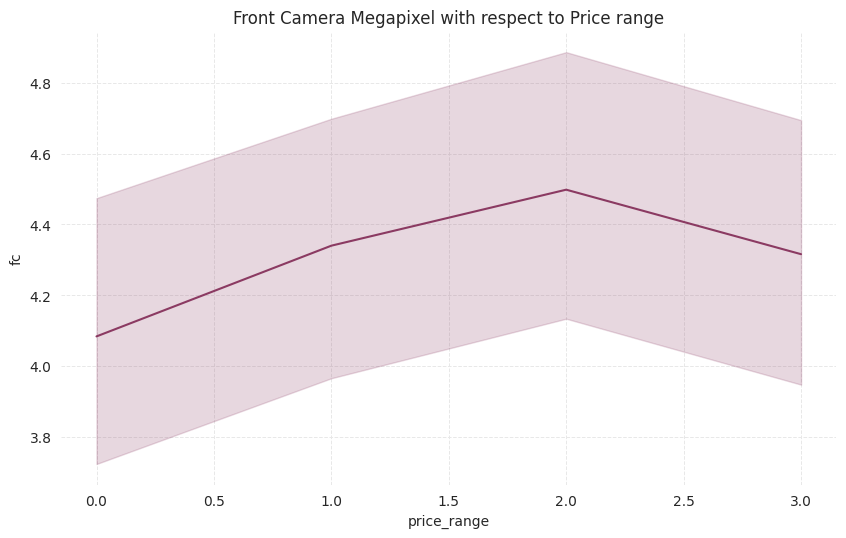

In [32]:
# Plotting rented bike count with respect to hour
line_plot('fc','Front Camera Megapixel with respect to Price range')

#### k. Mobile Weight over different price range

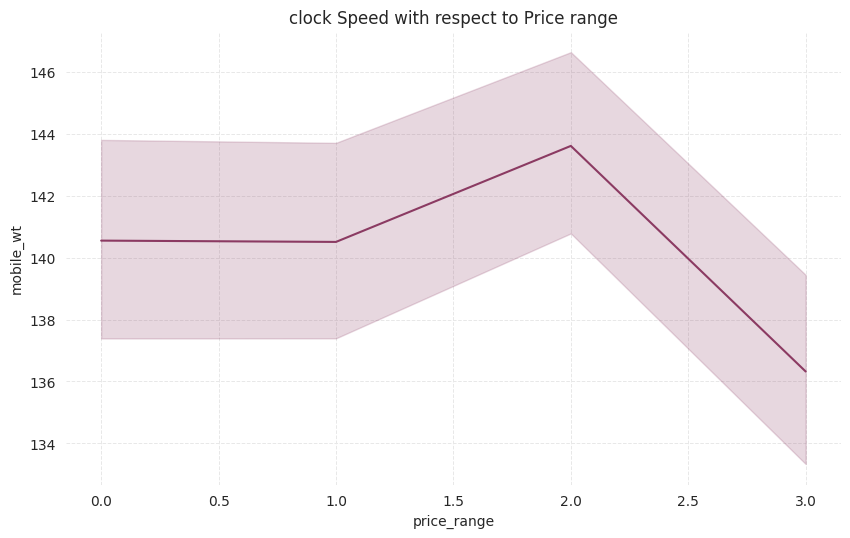

In [33]:
line_plot('mobile_wt','clock Speed with respect to Price range')

In [34]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_area,px_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,63,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,51,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,22,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,128,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,16,1464096


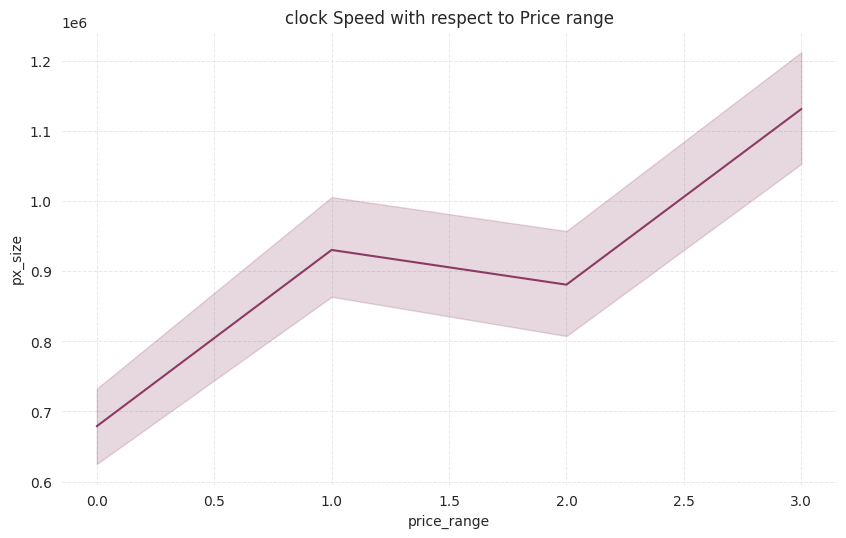

In [35]:
line_plot('px_size','clock Speed with respect to Price range')

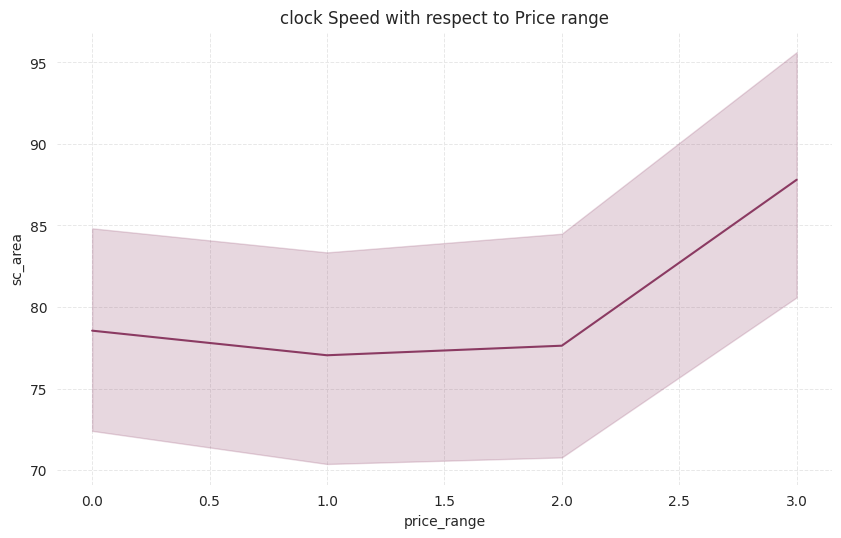

In [36]:
line_plot('sc_area','clock Speed with respect to Price range')

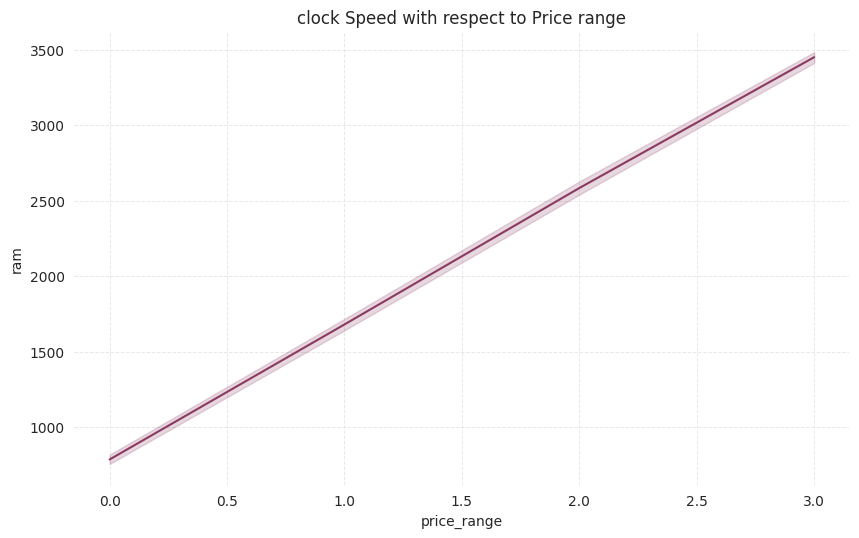

In [37]:
line_plot('ram','clock Speed with respect to Price range')

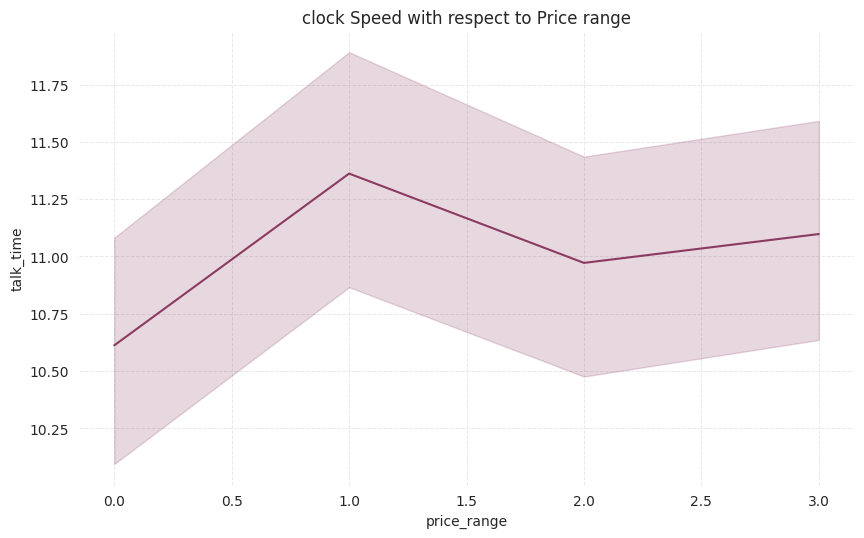

In [38]:
line_plot('talk_time','clock Speed with respect to Price range')

We have tried to draw useful insights from all variables. These insights are useful to identify the factors which drives mobile pricing. We are done with our first major task of analysation and our second task is to build a predictive model which can predict the price range of a given mobile on the basis of its features. For this first we will see if there is any hint of multicollinearity among our variables. If so, we have to handle those variables.

---------------------------------------------------------------------------------

# Correlation

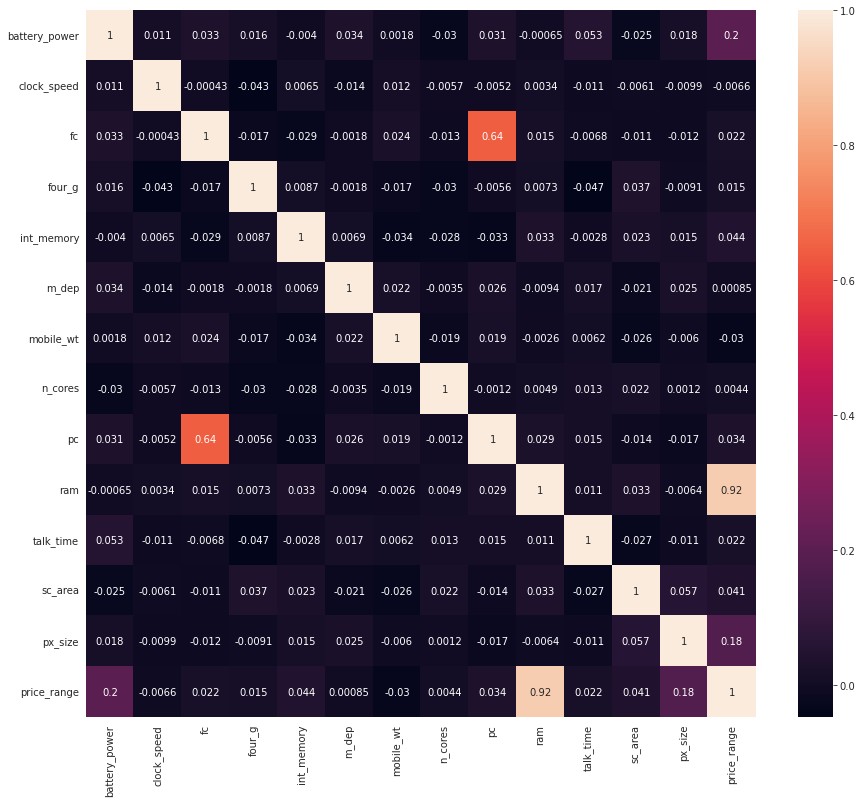

In [39]:
continous_df = df[['battery_power','clock_speed','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc', 'ram', 'talk_time','sc_area', 'px_size','price_range']]

plt.figure(figsize=(15,13))
sns.heatmap(continous_df.corr(),annot=True)

We can't see multicollinearity among our variables which is a good thing. let's process our data for the model fitting.

# Splitting Data for Trainng and Testing

We are first going to assign variables to our dependent and Independent variable values. After that we are going to split our total data into 4:1 train to test ratio. 

In [40]:
X=df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 
      'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
      'n_cores', 'pc', 'px_size', 'ram', 'sc_area', 'talk_time']].values
y=df['price_range'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1) 

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1600, 18)
Shape of y_train =  (1600,)
Shape of X_test =  (400, 18)
Shape of y_test =  (400,)


Before applying models, it is important to generalise our data. For this we will be using standardization method.

In [41]:
# Scaling our data to take generalized values
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,6:]= sc.fit_transform(X_train[:, 6:])
X_test[:,6:]= sc.transform(X_test[:, 6:])

# Model Fitting

In [45]:
# Importing libraries of models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Importing libraries for evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve

from sklearn import metrics

In [60]:
#confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='flare')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm


1.Random Forest

In [61]:
#building the model

rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [62]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)

Random Forest Classifier Accuracy Score:  0.8725
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        92
           1       0.82      0.89      0.85        96
           2       0.81      0.80      0.81       106
           3       0.91      0.89      0.90       106

    accuracy                           0.87       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



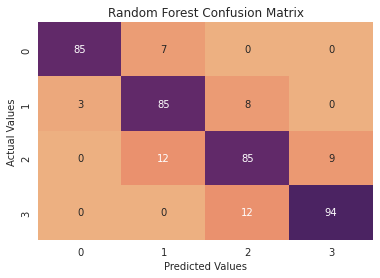

In [63]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

2. Naive Bayes

In [64]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)

Gaussian NB Classifier Accuracy Score:  0.755
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        92
           1       0.66      0.70      0.68        96
           2       0.64      0.68      0.66       106
           3       0.86      0.79      0.82       106

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



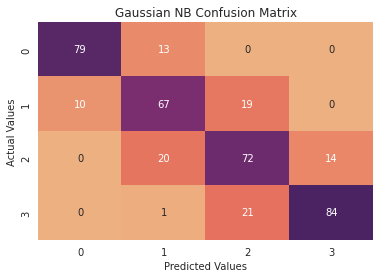

In [65]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_test, y_pred_gnb, 'Gaussian NB Confusion Matrix')

3. KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [67]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

KNN Classifier Accuracy Score:  0.5475
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        92
           1       0.37      0.44      0.40        96
           2       0.51      0.42      0.46       106
           3       0.80      0.60      0.69       106

    accuracy                           0.55       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.57      0.55      0.55       400



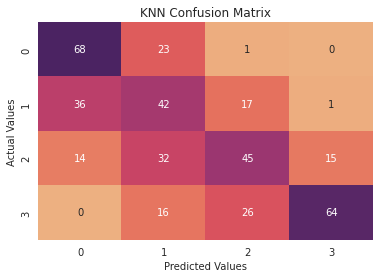

In [68]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

3. SVM

In [69]:
from sklearn import svm

In [70]:
svm_clf = svm.SVC(decision_function_shape='ovo')

In [71]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_test)

SVM Classifier Accuracy Score:  0.8875
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        92
           1       0.82      0.88      0.84        96
           2       0.85      0.84      0.84       106
           3       0.97      0.90      0.93       106

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



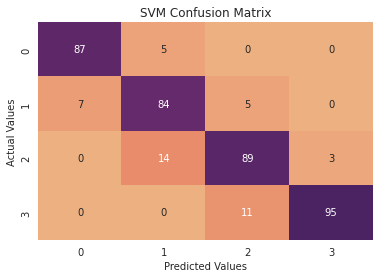

In [72]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

In [73]:
# Creating the dataframe of various scores of various models
model_validation = {'Model': ['Random Forest', 'Naive Bayes', 
                              'KNN', 'SVM'], 
                    'Accuracy Score':[accuracy_score(y_test,y_pred_rfc),
                                      accuracy_score(y_test,y_pred_gnb),
                                      accuracy_score(y_test,y_pred_knn),
                                      accuracy_score(y_test,y_pred_svm)]}
model_validate = pd.DataFrame(model_validation)
model_validate

,Model,Accuracy Score
0,Random Forest,0.8725
1,Naive Bayes,0.7550
2,KNN,0.5475
3,SVM,0.8875


Hyperparameter Tunning

In [75]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [76]:
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.631 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [78]:
grid_predictions = grid.predict(X_test)

SVM Classifier tuned Accuracy Score:  0.92
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        92
           1       0.90      0.91      0.90        96
           2       0.87      0.89      0.88       106
           3       0.96      0.92      0.94       106

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



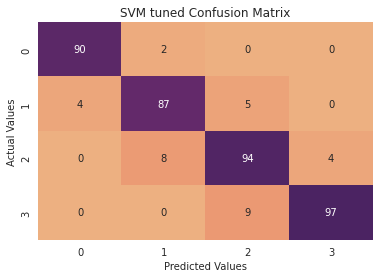

In [79]:
print('SVM Classifier tuned Accuracy Score: ',accuracy_score(y_test,grid_predictions))
cm_rfc=my_confusion_matrix(y_test, grid_predictions, 'SVM tuned Confusion Matrix')

In [80]:
# Creating the dataframe of various scores of various models
model_validation1 = {'Model': ['SVM tuned'], 
                    'Accuracy Score':[accuracy_score(y_test,grid_predictions)]}
model_validate1 = pd.DataFrame(model_validation1)
model_validate1

,Model,Accuracy Score
0,SVM tuned,0.92


# Confusion Matrix

### Using Evaluation Metrics to Analyse Model

### Cross Validating our Model

# CONCLUSION